## 김승열님은 게임 회사의 데이터 팀에 합류했습니다.

# 다음 분기에 어떤 게임을 설계해야 할까?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [41]:
# 데이터 정제 과정 EDA

# 1) 데이터 불러오기


In [42]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


#2) 먼저 시각적으로 문제 파악

In [77]:
#Unnamed : 0 컬럼 삭제
#Year / Genre / Publisher  문제발견 - 결측값 존재
#NA_Sales	EU_Sales	JP_Sales	Other_Sales - 데이터 타입 변환
#Year 연도의 missing value

# 2-1) 문제해결 
#        EDA - 데이터 정제

In [44]:
#Unnamed : 0 컬럼삭제
del df['Unnamed: 0']

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [46]:
#결측값을 확인 및 삭제
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [47]:
df = df.dropna()

In [48]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [50]:
#컬럼명만 변수선언
sale = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

In [51]:
# sales 안에 'K' , 'M' 단위를 계산해 'M' 단위기준으로 맞추기.
for i in sale:
  df[i] = df[i].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).astype(float)

In [52]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [53]:
#복사본
df1 = df.copy()

In [54]:
#데이터 타입 바꾸기
df1['Year'] = df1['Year'].astype(int)

In [55]:
## 0~98년의 데이터를 1900년대와 2000년대로 맞춰주기

#0~16년
df1.loc[ df1.Year< 17,'Year'] = 2000+df1.Year

#86~98년
df1.loc[ (17< df1.Year) & (df1.Year< 100),'Year'] = 1900+df1.Year

In [78]:
"""
확인절차 (3가지 게임 예시) 
Treasures of The Deep 게임 97년
Otoko Yukaku 게임 15년
Strider 2 게임 0년
"""

'\n확인절차 (3가지 게임 예시) \nTreasures of The Deep 게임 97년\nOtoko Yukaku 게임 15년\nStrider 2 게임 0년\n'

In [57]:
#확인
df_example = df1[df1['Name'].isin(['Treasures of the Deep','Otoko Yukaku','Strider 2'])]
df_example

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
81,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
7184,Otoko Yukaku,PSV,2015,Action,D3Publisher,0.00,0.00,0.02,0.00
14666,Strider 2,PS,2000,Platform,Virgin Interactive,0.05,0.03,0.00,0.01


In [58]:
df1.shape

(16241, 9)

In [59]:
df2 = df1.copy()

In [60]:
#중복된 데이터 없음
df2.duplicated().sum()

0

# 3) 그래프 시각화


#지역에 따라서 선호하는 게임 장르가 다를까?

In [61]:
#게임 장르 기준으로 그룹화 
#as_index = False   : 그룹 라벨 index 사용X

df_gen = df2.groupby('Genre', as_index=False).sum()
df_gen

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,6505617,858.75,513.64,156.60,183.99
1,Adventure,2546304,101.79,63.66,51.87,16.70
2,Fighting,1673860,220.35,99.90,87.14,36.15
3,Misc,3374273,394.73,208.15,104.18,72.64
4,Platform,1749321,445.38,200.63,130.53,51.45
5,Puzzle,1134959,121.58,50.47,56.24,12.44
6,Racing,2443902,354.70,235.02,56.32,76.51
7,Role-Playing,2940339,318.76,183.09,342.93,56.73
8,Shooter,2567579,574.48,310.23,38.18,101.86
9,Simulation,1697540,181.43,112.99,63.54,31.32


In [62]:
#나라별 장르 그래프화

Text(0.5, 1.0, 'Other_Sales')

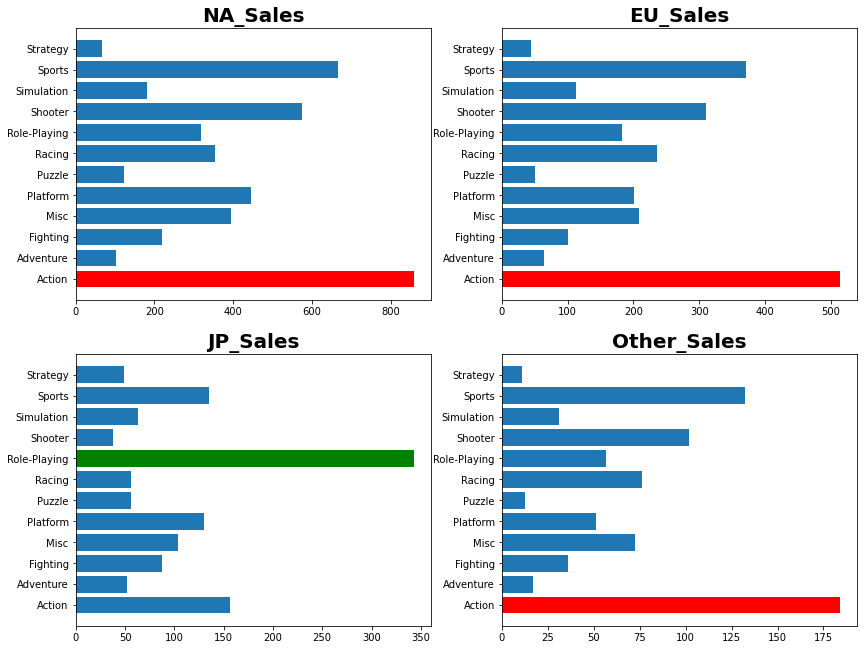

In [81]:
plt.figure(figsize = (14,11))
title_font = {'fontsize': 20,'fontweight': 'bold'}

plt.subplot(2,2,1)
plt.barh(df_gen['Genre'],df_gen['NA_Sales'])
plt.barh(df_gen['Genre'][0],df_gen['NA_Sales'], color = 'red')
plt.title('NA_Sales',fontdict=title_font)

plt.subplot(2,2,2)
plt.barh(df_gen['Genre'],df_gen['EU_Sales'])
plt.barh(df_gen['Genre'][0],df_gen['EU_Sales'], color = 'red')
plt.title('EU_Sales',fontdict=title_font)

plt.subplot(2,2,3)
plt.barh(df_gen['Genre'],df_gen['JP_Sales'])
plt.barh(df_gen['Genre'][7],df_gen['JP_Sales'], color = 'green')
plt.title('JP_Sales',fontdict=title_font)

plt.subplot(2,2,4)
plt.barh(df_gen['Genre'],df_gen['Other_Sales'])
plt.barh(df_gen['Genre'][0],df_gen['Other_Sales'], color = 'red')
plt.title('Other_Sales',fontdict=title_font)

In [82]:
# 1번 질문 : 지역에 따라서 선호하는 게임장르가 다를까 라는 질문에 대답해 주세요.

# 답변 :japen 지역을 제외하고 전체적으로 (1. Action   -  2. Sports  -  3.Shooter) 순으로 선호하며 미세한 차이를 보이고, 
#       japen 지역만 Role-Playing 장르 선호도가 압도적이다. 

#연도별 게임의 트렌드가 있을까?

In [86]:
#전체 출고량을 따로 열에 추가

In [66]:
df2['Total_Sales'] = df2['NA_Sales'] + df2['EU_Sales'] + df2['JP_Sales'] + df2['Other_Sales']
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [87]:
#연도와 장르를 기준으로 전체출고량 합산

In [67]:
df_year = df2.groupby(['Year','Genre'], as_index=False)['Total_Sales'].sum()
df_year

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.63
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [68]:
#매년 최대값을 가진 장르를 도출
year_trend = df_year.groupby(['Year'])['Total_Sales'].transform(max) == df_year['Total_Sales']
year_trend_max = df_year[year_trend].reset_index(drop=True)

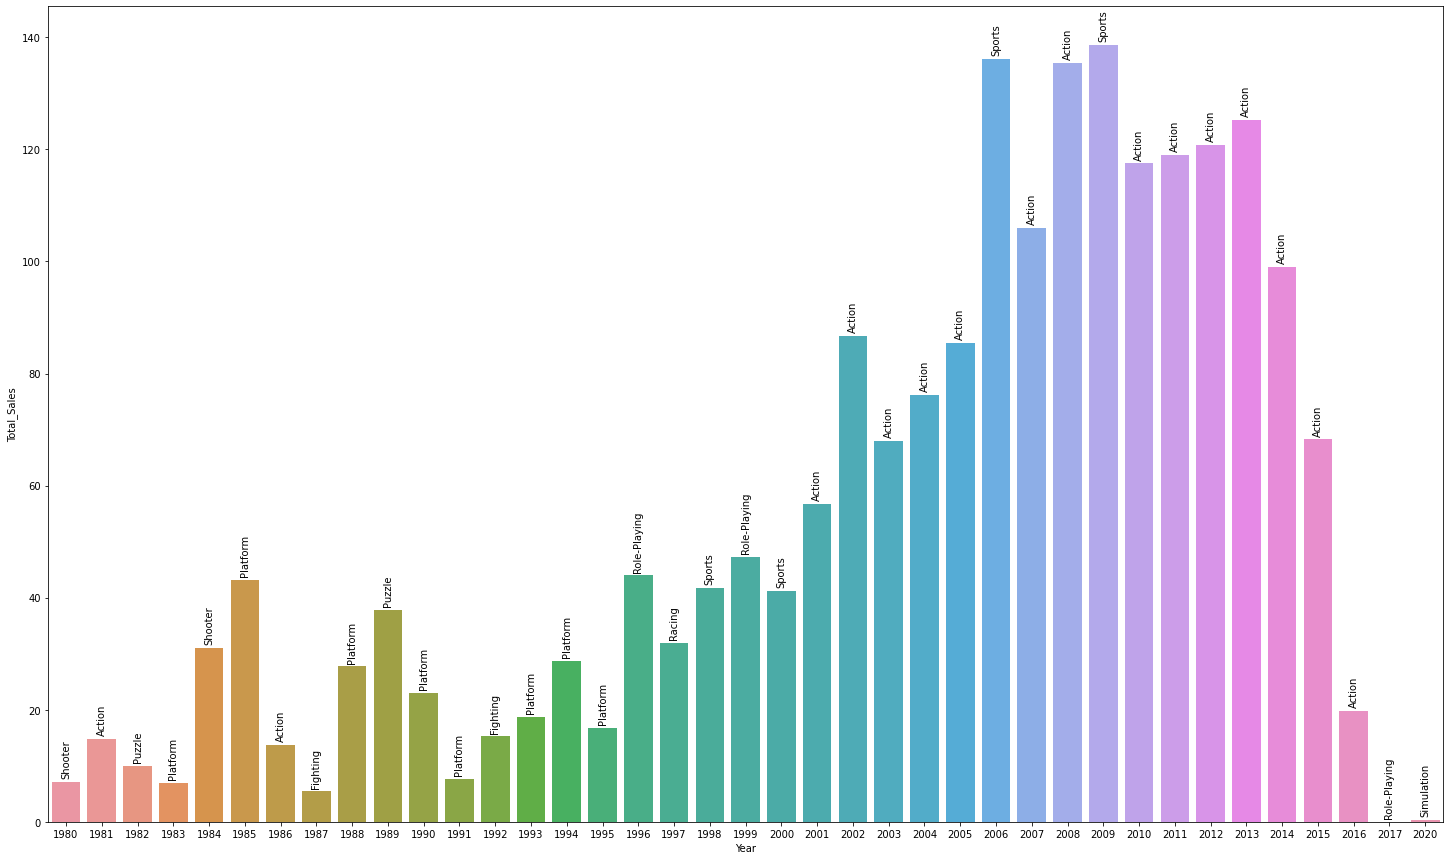

In [85]:
#그래프 시각화

#max 대표값 가진 장르 리스트
genre =year_trend_max['Genre']

#barplot - (ci) 오차구간 사용X
plt.figure(figsize=(25,15))
Z = sns.barplot(x='Year', y='Total_Sales', data=year_trend_max, ci=None)

#첫번째부터 이름기입
index = 0

#각 막대 그래프에 해당 장르 기입
for v in year_trend_max['Total_Sales']:
  Z.text(index, v+1,  str(genre[index]), color ='black', size = 10, ha = 'center', rotation=90)
  index +=1
  if index == 39 :
    break

In [122]:
#1996년대 롤플레잉 게임 내림차순 정리 
df2[(df2['Year'] == 1996) & (df2['Genre'] =='Role-Playing')].sort_values('Total_Sales', ascending = False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
13297,Super Mario RPG: Legend of the Seven Stars,SNES,1996,Role-Playing,Nintendo,0.66,0.00,1.45,0.03,2.14
13730,Diablo,PC,1996,Role-Playing,Activision,0.01,1.58,0.00,0.00,1.59


###2006~2007/2009 스포츠 장르의 미친 영향

####2006년 - 월드컵 개최

In [120]:
df2[(df2['Year'] == 2006) & (df2['Genre'] =='Sports')].sort_values('Total_Sales', ascending = False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
14918,Madden NFL 07,PS2,2006,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49
13026,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.40


####2007년

In [118]:
df2[(df2['Year'] == 2007) & (df2['Genre'] =='Sports')].sort_values('Total_Sales', ascending = False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3435,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
8482,Mario & Sonic at the Olympic Games,Wii,2007,Sports,Sega,2.58,3.90,0.66,0.91,8.05
8213,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.62


####2009년 <- 2010년 월드컵 직전 년도

In [110]:
df2[(df2['Year'] == 2009) & (df2['Genre'] =='Sports')].sort_values('Total_Sales', ascending = False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10899,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
10594,Mario & Sonic at the Olympic Winter Games,Wii,2009,Sports,Sega,1.89,1.99,0.22,0.48,4.58


In [121]:
"""
Action 장르의 게임이 지속적으로 출고량이 높았지만
2006년 월드컵을 이어 세계적으로 스포츠에도 관심이 높아진 것으로 보인다.
"""

'\nAction 장르의 게임이 지속적으로 출고량이 높았지만\n2006년 월드컵을 이어 세계적으로 스포츠에도 관심이 높아진 것으로 보인다.\n'

In [70]:
# 2.질문 : 연도별 게임의 트렌드가 있을까? 

# 답변 : 20세기때는 대체로 게임 트렌드가 다양했고, 21세기 부터는 Action 장르가 가장 수요가 높다. 그중 2006년과 2009년는 Action 보다 Sports 장르의 수요가 많다.

#출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 한다.


###분석

In [131]:
#필요한 열 추출 및 Total_Sales 기준 오름차순
df2_sort = df2[['Name','Genre','Total_Sales']]
sort_game = df2_sort.sort_values(['Total_Sales'], ascending = False).reset_index(drop=True)

#top10 게임 파악

sort_game.head(10)

,Name,Genre,Total_Sales
0,Wii Sports,Sports,82.74
1,Super Mario Bros.,Platform,40.24
2,Mario Kart Wii,Racing,35.83
3,Wii Sports Resort,Sports,33.00
4,Pokemon Red/Pokemon Blue,Role-Playing,31.38
5,Tetris,Puzzle,30.26
6,New Super Mario Bros.,Platform,30.01
7,Wii Play,Misc,29.01
8,New Super Mario Bros. Wii,Platform,28.61
9,Duck Hunt,Shooter,28.31


###시각화

In [132]:
df3_sort_game = sort_game.head(10)

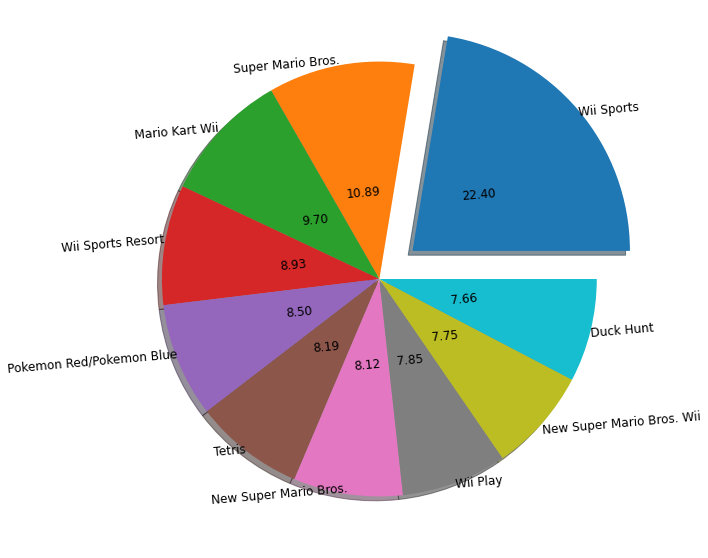

In [133]:
plt.figure(figsize=(10,10))
plt.pie(df3_sort_game['Total_Sales'] ,
        autopct = '%.2f',
        pctdistance = 0.4,
        shadow = True,
        labels = df3_sort_game['Name'],
        labeldistance = 1.0,
        explode = [0.2,0,0,0,0,0,0,0,0,0],
        startangle=0,
        textprops = {'rotation':5,'size':12},
        radius = 1);

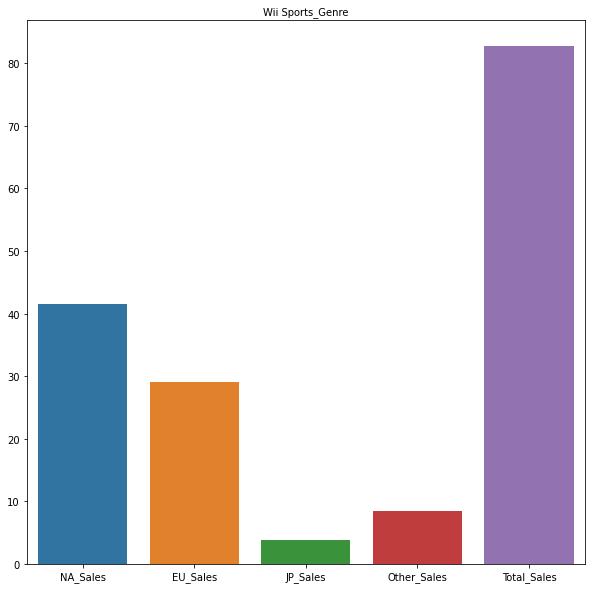

In [74]:
# Wii Sports 판매량 및 수요 가장 많다.
df_wii = df2[df2['Name'] == 'Wii Sports']
wii = df_wii.drop(['Year'], axis=1)

#그래프
plt.figure(figsize=(10,10))
sns.barplot(data = wii)
plt.title("Wii Sports_Genre", fontsize =10);

In [150]:
# top10중에 스포츠 장르의 비중
#스포츠 출고량 합
sports = df3_sort_game[(df3_sort_game['Genre'] =='Sports')]['Total_Sales'].sum()

#platform - top10에 3가지 게임
platform = df3_sort_game[(df3_sort_game['Genre'] =='Platform')]['Total_Sales'].sum()
print(sports, platform)

115.74000000000001 98.86


In [145]:
#top10 출고량 합
all = df3_sort_game['Total_Sales'].sum()
all

369.39000000000004

In [151]:
print('스포츠 출고량 비중 : {:.2f} '.format(sports/all))
print('플랫폼 출고량 비중 : {:.2f} '.format(platform/all))

스포츠 출고량 비중 : 0.31 
플랫폼 출고량 비중 : 0.27 


In [152]:
## 스포츠 30%
## 플랫폼 27%  

In [75]:
"""
Wii Sports 판매량 순위는 NA -> EU -> Other -> JP
"""

'\nWii Sports 판매량 순위는 NA -> EU -> Other -> JP\n'

#Q) 그럼 왜 갈수록 수요가 높아지지 않을까?

Text(30, 420, ' iphone-Aapple / Mobile app ')

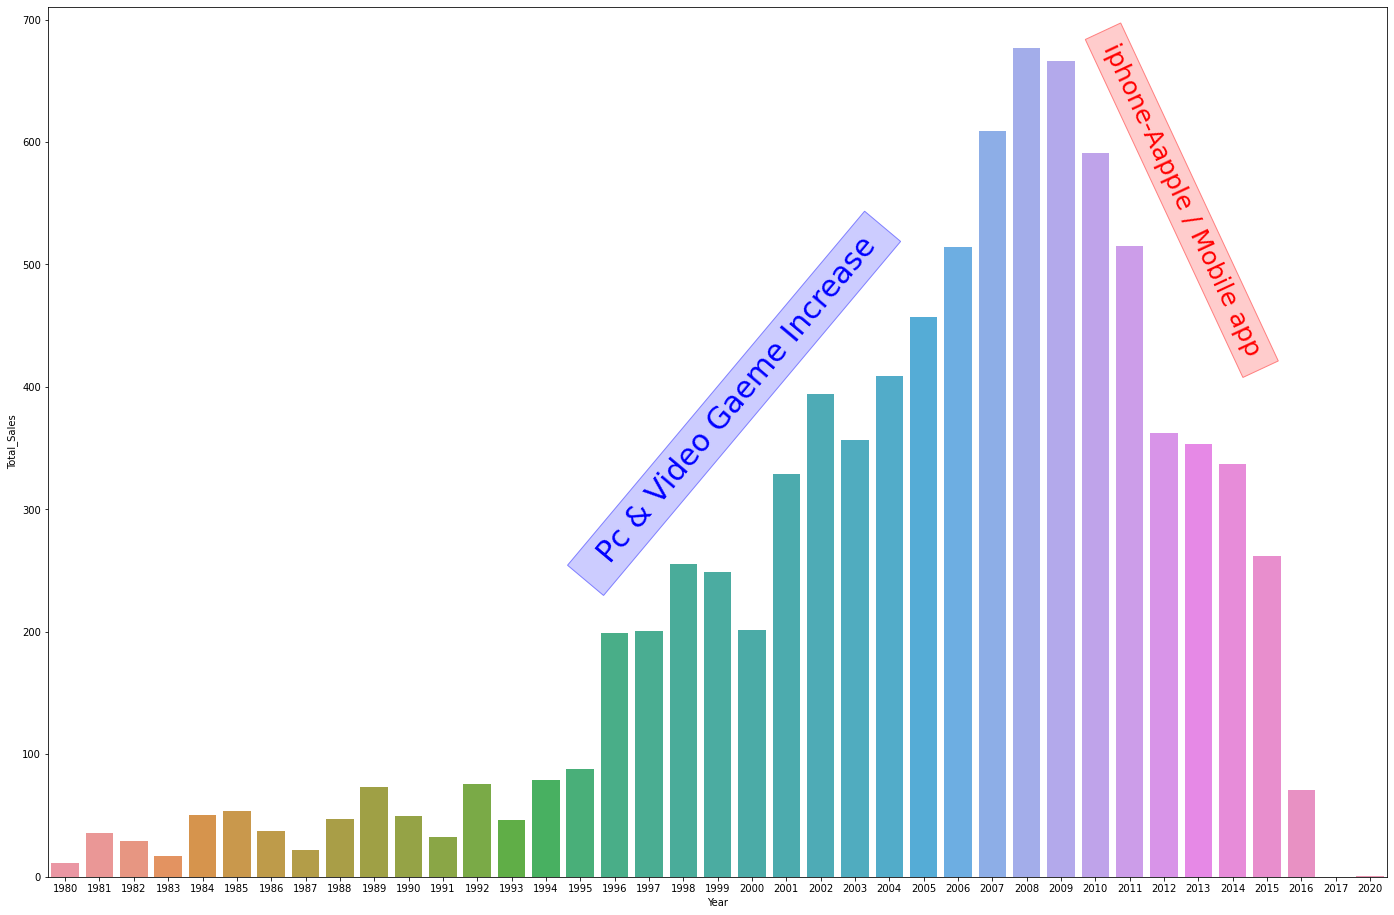

In [171]:
df_total = df2.groupby(['Year'], as_index=False)['Total_Sales'].sum()



plt.figure(figsize=(24,16))
sns.barplot(x='Year', y='Total_Sales', data=df_total, ci=None)

font1 = {
    'family' : 'Times New Roman',
    'color' : 'blue',
    'size' : '30',
    'weight' : 'normal',
    'alpha' : 1
}

font2 = {
    'family' : 'Times New Roman',
    'color' : 'red',
    'size' : '25',
    'weight' : 'normal',
    'alpha' : 1
}


box1 = {
    'boxstyle' : 'square',
    'ec' : (0.5,0.5,1.0),
    'fc' : (0.8,0.8,1.0)

}

box2 = {
    'boxstyle' : 'square',
    'ec' : (1.0,0.5,0.5),
    'fc' : (1.0,0.8,0.8)
}

#pc 게임 보급화와 video 게임의 시너지 효과 -> 수요 증가
plt.text(15,245,'  Pc & Video Gaeme Increase ', fontdict = font1, rotation = 50, bbox = box1)

#핸드폰 출시 및 모바일 게임
plt.text(30,420,' iphone-Aapple / Mobile app ', fontdict = font2, rotation = -65, bbox = box2)


"""
 1. [격변의 시기] 2000년대부터는 아날로그에서 디지털 세계로 변화하면서 모바일 세상이 다가오게 된다.
 1996년대부터 pc게임의 그래픽이 좋아지면서 수요가 증가하였고, 2008년부터 수요가 점차 떨어지더니 2012년에 폭락을 경험하고 2017년 이후 부터는 수요가 없을 정도이다.
그 이유는 2007년도에 아이폰이 출시되었기 때문이다. 약 1년동안은 (2007년~2008년) 수요에 영향을 미치진 못했지만 2008년도 부터 아이폰 (3G) 앱스토어 기반 (게임,지도,통화 등) 활용성이 넓어져 대중에 관심을 모은것으로 보인다. 즉, 모바일 외에 게임 플랫폼 하락의 시발점인 것이다.
2. 아이폰에 이어 갤럭시 시리즈를 출시하며, 점차 비디오 플랫폼 게임회사의 자리는 없어져갔다.
 """